![logo](Data/logo.png)

This notebook uses the `pandas` library to read the [list](./Data/listOfWildFire.csv) of largest wild fire per country present in the Data directory.
The list is extracted from [wikipedia](https://en.wikipedia.org/wiki/List_of_largest_fires_of_the_21st_century) where a most updated version is available.


then, plot
* the total area burn per year and select the year with the highest area burnt
* the correlation between area burnt and number of fatalities
* a map of total area burnt per country. For this you can use the library `geopandas`, see [here](https://geopandas.org/en/v0.2.1/mapping.html.)


This list only gathers 14 large wildfire, and as stated by the authors, it cannot satisfy particular standards for completeness, Drawing conclusion from this simple analysis is therefore hazardous.

## load library

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from scipy import stats

## Proposed solution

/opt/imfse/lib/python3.11/site-packages/geopandas/geodataframe.py:2057: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


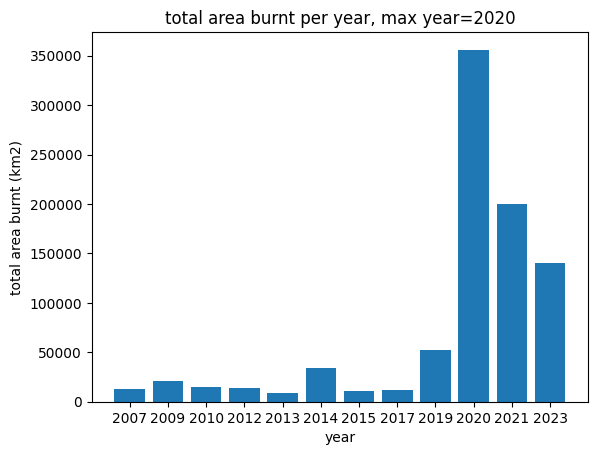

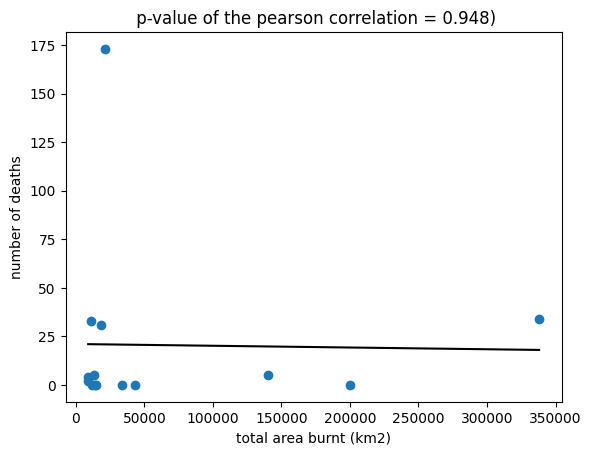

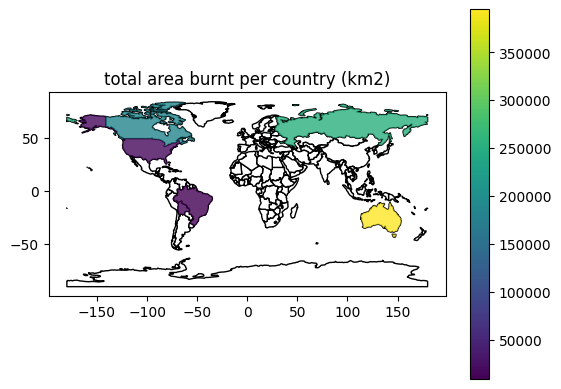

In [4]:
    #read file
    ####################
    data = pd.read_csv('Data/listOfWildFire.csv', delimiter=';')

   
    #clean data
    #fire season in the australia is attributed to the starting year, ie '2006-2007'='2007'
    ####################
    years = data['year'].str.split('-', expand=True)
    year = years[0]
    year[~years[1].isnull()] = years[1][~years[1].isnull()]
    data['newyear'] = year


    #plot total area per year and select max year
    ####################
    sumPerYear = data.groupby('newyear')[['area burn (km2)','deaths']].sum()
    ax = plt.subplot(111)
    ax.bar(sumPerYear.index,sumPerYear['area burn (km2)'])
    ax.set_xlabel('year')
    ax.set_ylabel('total area burnt (km2)')
    ax.set_title(r'total area burnt per year, max year={:s}'.format(sumPerYear.index[sumPerYear['area burn (km2)'].argmax()]))


    #plot correlation area burnt and fatalities
    ####################
    plt.figure()
    ax = plt.subplot(111)
    ax.scatter(data['area burn (km2)'], data['deaths'])

    corr = stats.linregress(data['area burn (km2)'], data['deaths'])
    xx = np.linspace(data['area burn (km2)'].min(), data['area burn (km2)'].max(), 100)
    ax.plot(xx,xx*corr.slope+corr.intercept, c='k')
    ax.set_ylabel('number of deaths')
    ax.set_xlabel('total area burnt (km2)')
    ax.set_title(r' p-value of the pearson correlation = {:.3f})'.format(corr.pvalue))
   

    #plot total area burn per country
    ####################
    #worldAll = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    worldAll = gpd.read_file('Data/WorldMap/ne_110m_admin_0_countries.shp')

    #merge with data
    world = worldAll.merge(data, left_on='NAME', right_on='country')
    #and sum per country
    world = world[['country','geometry','area burn (km2)']].dissolve(by='country', aggfunc=sum)
    
    plt.figure()
    ax = plt.subplot(111)
    worldAll.plot(color='white',edgecolor="black",ax=ax)
    world.plot(column='area burn (km2)', legend=True, ax=ax, alpha=.8)
    ax.set_title('total area burnt per country (km2)')

    
    #show figure
    plt.show()